# La base de données

In [1]:
import pandas as pd 
data = pd.read_csv('heartdata.csv')
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


Âge (age) : L'âge du patient en années.
Sexe (sex) : Le sexe du patient, où 1 représente un homme et 0 représente une femme.
Type de douleur thoracique (chest pain type) : Le type de douleur thoracique ressentie par le patient, généralement classé de 1 à 4 selon la sévérité ou la nature de la douleur.
Pression artérielle au repos (resting bp s) : La pression artérielle du patient au repos, mesurée en mm de mercure (mmHg).
Cholestérol (cholesterol) : Le niveau de cholestérol du patient, mesuré en mg/dL.
Sucre dans le sang à jeun (fasting blood sugar) : Le taux de sucre dans le sang du patient à jeun, où 1 indique un taux de sucre élevé et 0 un taux normal.
ECG au repos (resting ecg) : Les résultats de l'électrocardiogramme (ECG) du patient au repos, souvent codés comme 0 pour normal, 1 pour une anomalie de l'onde ST-T, et 2 pour une hypertrophie ventriculaire gauche. (Le segment ST est important dans l'évaluation des troubles du rythme cardiaque et des problèmes d'ischémie cardiaque. )
Fréquence cardiaque maximale (max heart rate) : La fréquence cardiaque maximale atteinte par le patient lors d'un test d'effort.
Angine de poitrine à l'exercice (exercise angina) : Présence ou absence d'angine de poitrine induite par l'exercice, où 1 indique qu'elle est présente et 0 indique qu'elle est absente.
Dépression ST induite par l'exercice (oldpeak) : La dépression du segment ST induite par l'exercice par rapport au repos.
Pente du segment ST à l'exercice (ST slope) : La pente du segment ST pendant l'exercice, généralement classée en 0 pour descendante, 1 pour plate et 2 pour ascendante.
Cible (target) : La variable cible, où 1 indique la présence de maladie cardiaque et 0 indique son absence.
Ces colonnes constituent les caractéristiques de votre ensemble de données sur les maladies cardiaques, avec la colonne "target" servant de variable à prédire.

# Exploratory data analysis

In [5]:
data.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [7]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


Ces résultats indiquent qu'il n'y a aucune valeur manquante (missing values) dans l'ensemble de données. Chaque colonne, y compris la variable cible "target", ne contient aucun NaN ou valeur manquante.

In [22]:
data['target'].value_counts(normalize=True)


1    0.528571
0    0.471429
Name: target, dtype: float64

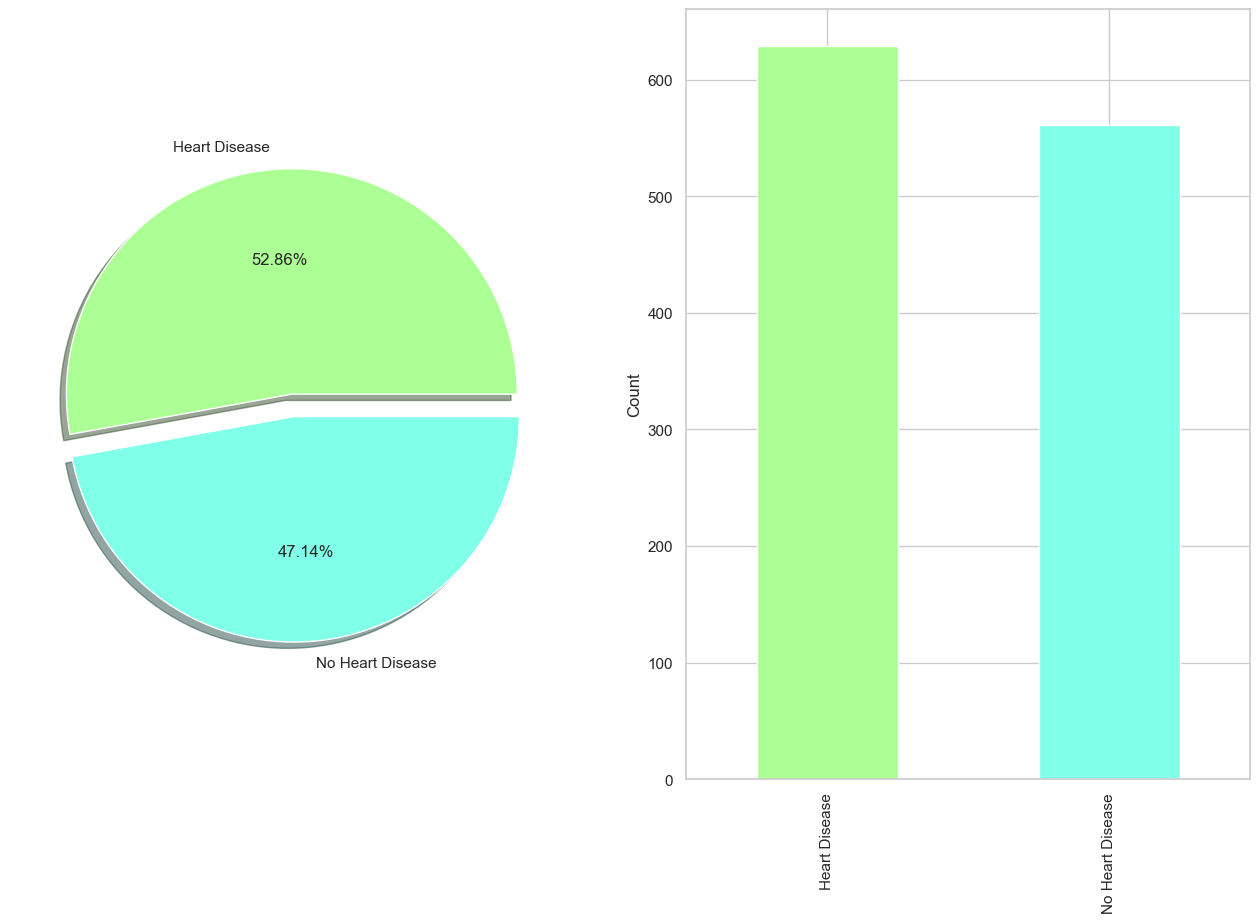

In [26]:
f, ax = plt.subplots(1, 2, figsize=(16,10))
data["target"].replace({0:"No Heart Disease", 1:"Heart Disease"}).value_counts().plot(kind='pie', colors=["#ACFF94", "#80FFE9"], ax=ax[0], explode=[0,0.1], autopct='%1.2f%%', shadow=True)
data["target"].replace({0:"No Heart Disease", 1:"Heart Disease"}).value_counts().plot(kind='bar', color=["#ACFF94", "#80FFE9"], ax=ax[1])
ax[0].set_ylabel('')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('')
plt.show()

Ces fréquences ne sont pas exactement égales, mais elles sont relativement proches l'une de l'autre. Dans ce contexte, on peut dire que les données sont relativement équilibrées car il n'y a pas de déséquilibre significatif entre les deux classes.

In [9]:
# Vérifier les doublons
doublons = data[data.duplicated()]

# Afficher les doublons s'il y en a
if not doublons.empty:
    print("Voici les lignes en doublon :")
    print(doublons)
else:
    print("Aucun doublon trouvé dans votre base de données.")

Voici les lignes en doublon :
      age  sex  chest pain type  resting bp s  cholesterol  \
163    49    0                2           110          208   
604    58    1                3           150          219   
887    63    1                1           145          233   
888    67    1                4           160          286   
889    67    1                4           120          229   
...   ...  ...              ...           ...          ...   
1156   42    1                3           130          180   
1157   61    1                4           140          207   
1158   66    1                4           160          228   
1159   46    1                4           140          311   
1160   71    0                4           112          149   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
163                     0            0             160                0   
604                     0            1             118                1   


In [10]:

# Supprimer les doublons de votre DataFrame
data_sans_doublons = data.drop_duplicates()

# Afficher la taille de votre DataFrame après suppression des doublons
print("Taille de l'ensemble de données après suppression des doublons :", data_sans_doublons.shape)


Taille de l'ensemble de données après suppression des doublons : (918, 12)


<Axes: >

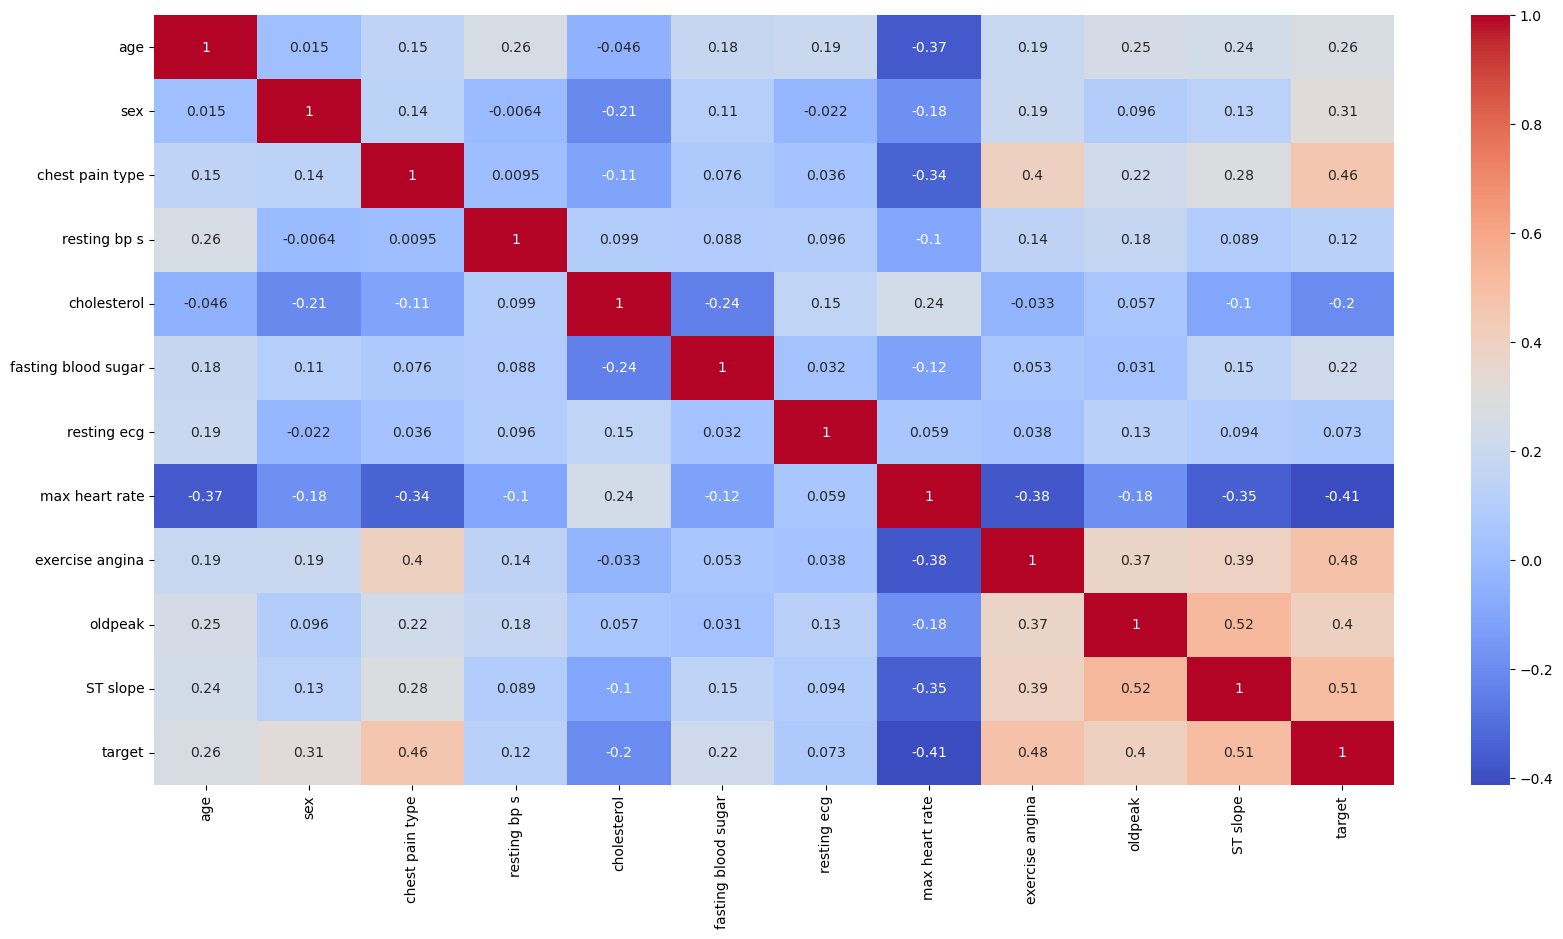

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

La matrice de corrélation entre les variables révèle plusieurs relations intéressantes. Par exemple, l'âge présente une corrélation positive modérée avec la pression artérielle au repos (0.26) et une corrélation négative modérée avec la fréquence cardiaque maximale (-0.37). Cela suggère que les personnes plus âgées ont tendance à avoir une pression artérielle au repos plus élevée et une fréquence cardiaque maximale plus basse. De plus, le type de douleur thoracique présente une corrélation modérée à forte avec l'angine de poitrine à l'exercice (0.40) et la pente du segment ST à l'exercice (0.28), ce qui indique une relation entre ces variables dans le contexte des symptômes cardiaques.

L'analyse de la corrélation entre les variables de l'ensemble de données et la variable cible "target" révèle plusieurs tendances significatives. Tout d'abord, l'âge présente une corrélation positive modérée de 0.26 avec la probabilité de maladie cardiaque, suggérant que plus l'âge augmente, plus la probabilité de maladie cardiaque augmente également. De même, le sexe, avec une corrélation de 0.31, indique une tendance modérée à élevée vers une probabilité accrue de maladie cardiaque chez les hommes. Le type de douleur thoracique, avec une corrélation de 0.46, dénote une corrélation positive modérée à forte, suggérant que certains types de douleur thoracique peuvent être plus fortement liés à des problèmes cardiaques que d'autres. En revanche, la fréquence cardiaque maximale présente une corrélation négative modérée de -0.41, ce qui suggère que des valeurs plus élevées de fréquence cardiaque maximale pourraient être associées à une probabilité moindre de maladie cardiaque. Ces tendances mettent en lumière l'importance de ces variables dans la prédiction des risques de maladie cardiaque.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest pain type'}>],
       [<Axes: title={'center': 'resting bp s'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting blood sugar'}>],
       [<Axes: title={'center': 'resting ecg'}>,
        <Axes: title={'center': 'max heart rate'}>,
        <Axes: title={'center': 'exercise angina'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ST slope'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

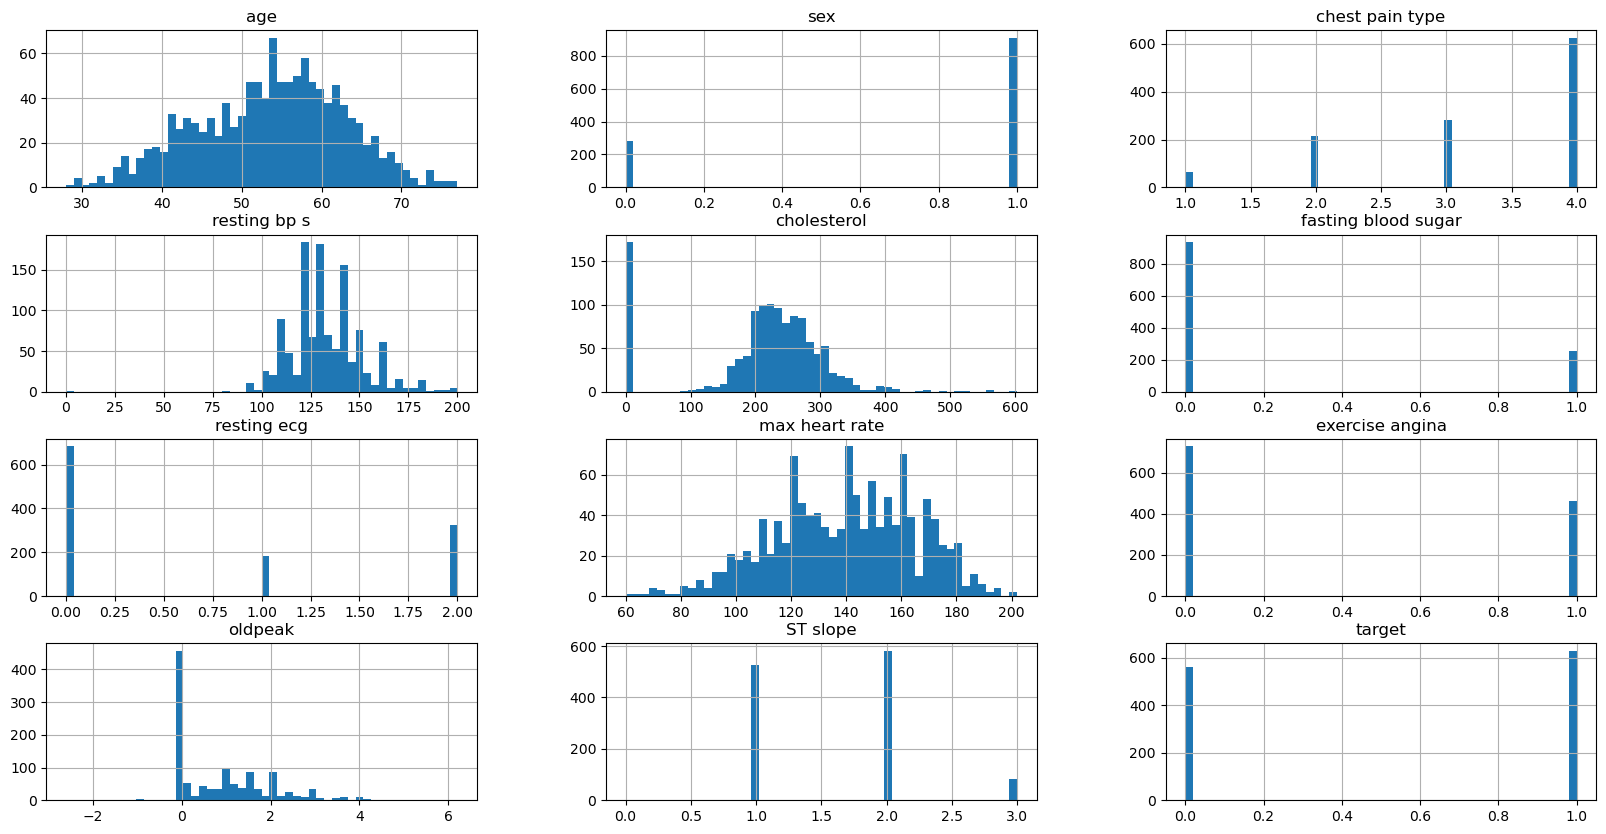

In [16]:
data.hist(figsize=(20,10),bins = 50)


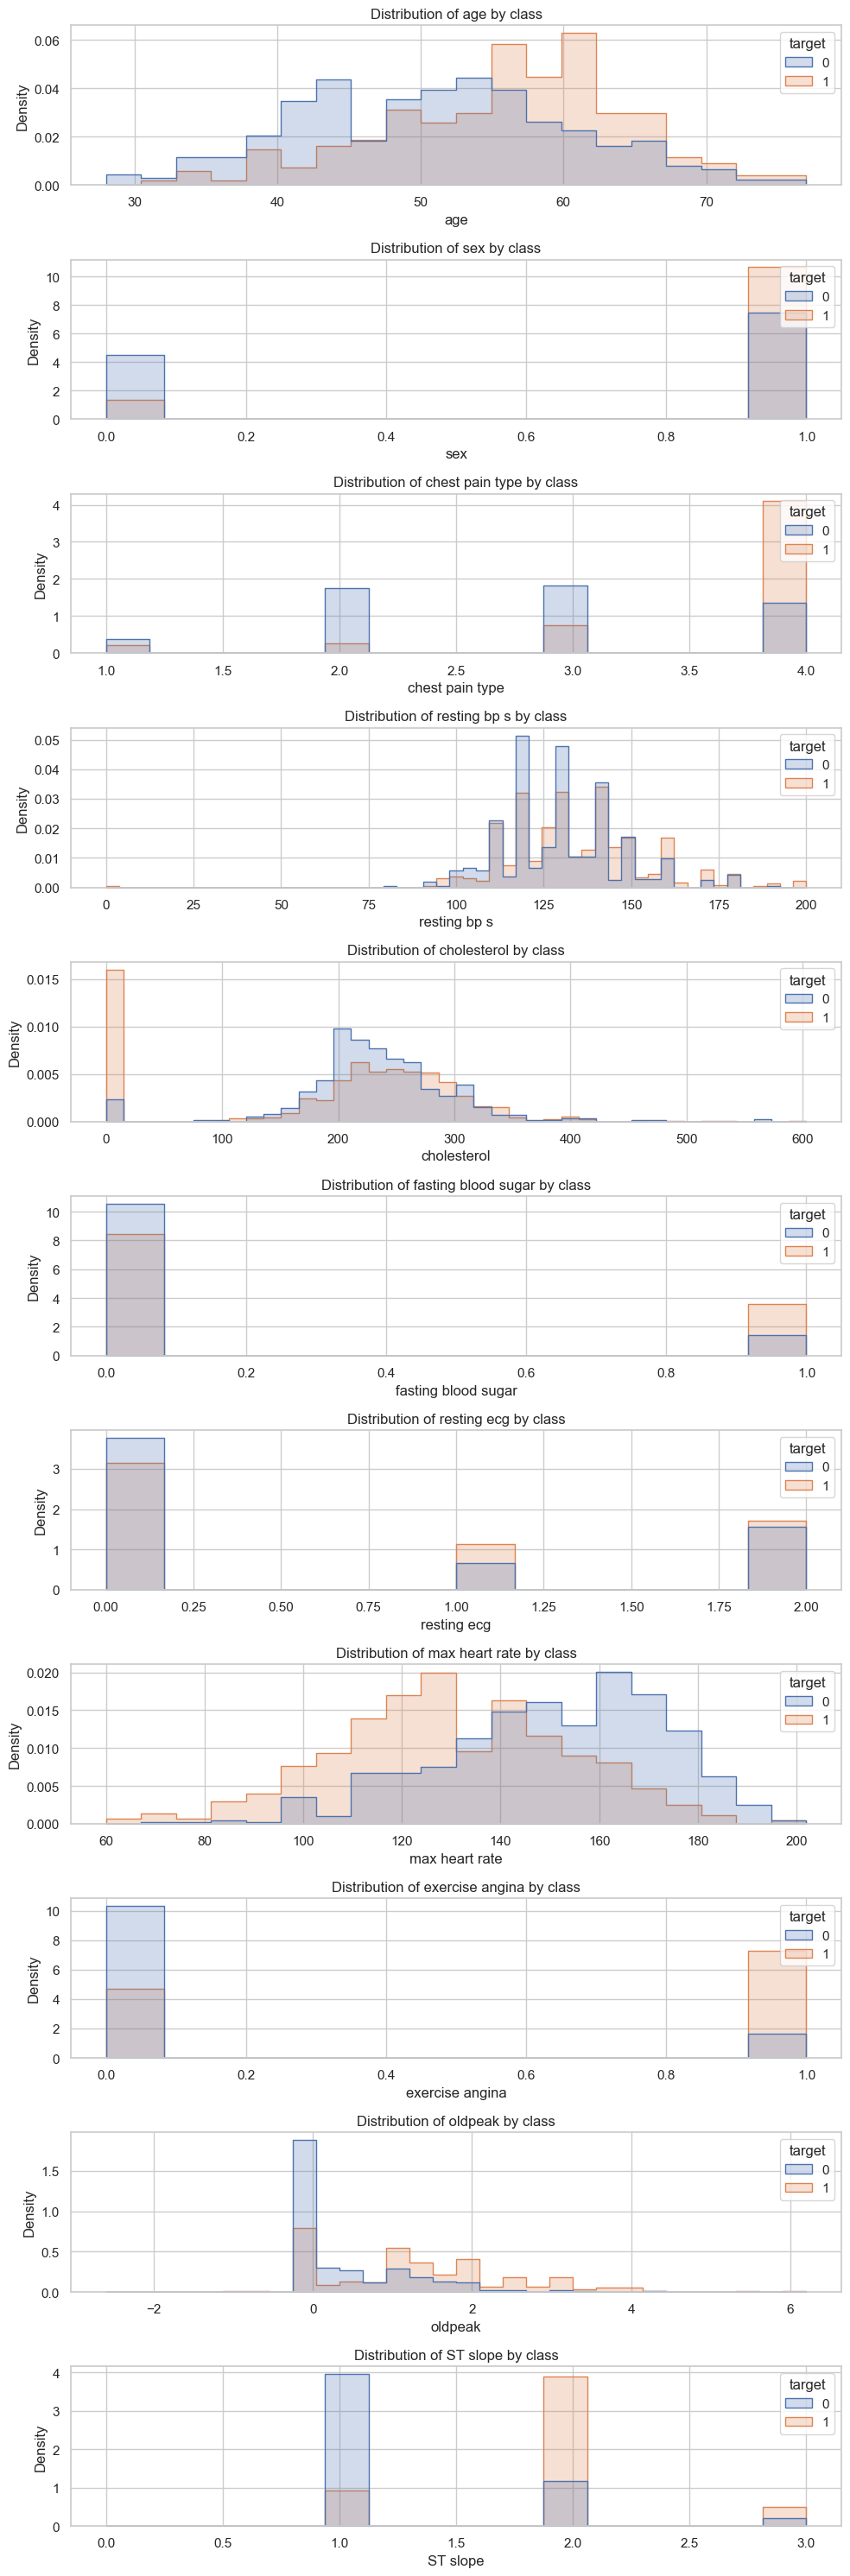

In [21]:
# Set the style of seaborn
sns.set(style="whitegrid")

# List of columns to plot
cols_to_plot = X.columns

# Create subplots
fig, axs = plt.subplots(nrows=len(cols_to_plot), figsize=(10, 30))

# Create histogram for each column
for i, col in enumerate(cols_to_plot):
    sns.histplot(data=data, x=col, hue="target", element="step", stat="density", common_norm=False, ax=axs[i])
    axs[i].set_title(f'Distribution of {col} by class')

plt.tight_layout()
plt.show()

In [28]:
gender_output_counts = data.groupby(['sex', 'target']).size().unstack(fill_value=0)
total_men = gender_output_counts.loc[0].sum()
total_women = gender_output_counts.loc[1].sum()

# Calculate percentages
men_none_percentage = (gender_output_counts.loc[0, 0] / total_men) * 100
men_yes_percentage = (gender_output_counts.loc[0, 1] / total_men) * 100
women_none_percentage = (gender_output_counts.loc[1, 0] / total_women) * 100
women_yes_percentage = (gender_output_counts.loc[1, 1] / total_women) * 100

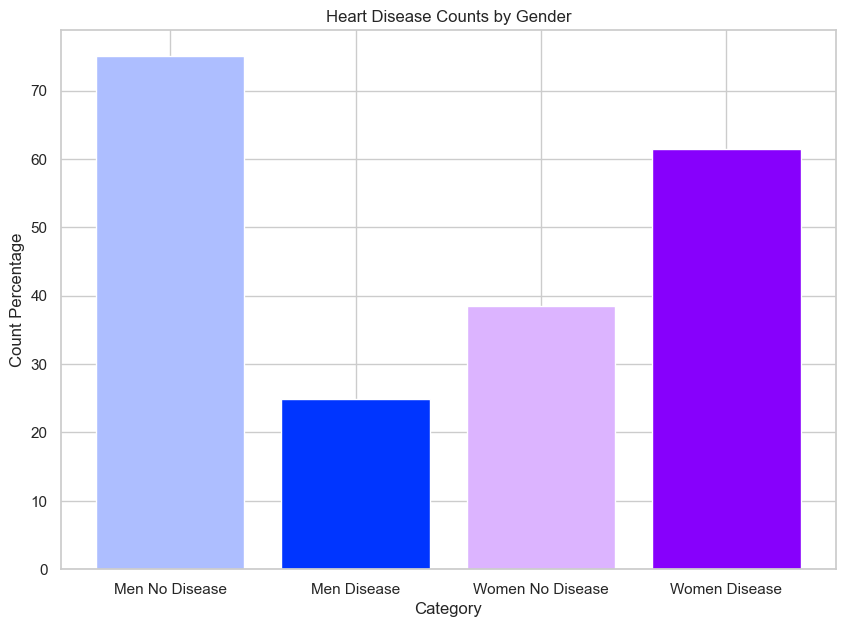

In [30]:
fig = plt.figure(figsize =(10, 7))
categories = ['Men No Disease', 'Men Disease', 'Women No Disease', 'Women Disease']
percentages = [men_none_percentage, men_yes_percentage, women_none_percentage, women_yes_percentage]

plt.bar(categories, percentages, color=['#ADBEFF', '#0035FF', '#DCB4FF', '#8700FC'])
plt.xlabel('Category')
plt.ylabel('Count Percentage')
plt.title('Heart Disease Counts by Gender')
plt.show()

# Sélection des variables

In [85]:
x=data.drop(["target"],axis=1)
x

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2
1186,68,1,4,144,193,1,0,141,0,3.4,2
1187,57,1,4,130,131,0,0,115,1,1.2,2
1188,57,0,2,130,236,0,2,174,0,0.0,2


In [86]:
y=data["target"]
y=pd.DataFrame(y)
y

,target
0,0
1,1
2,0
3,1
4,0
...,...
1185,1
1186,1
1187,1
1188,1


In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=0)

## k-best

SelectKBest est une méthode de sélection de fonctionnalités en apprentissage automatique qui identifie les K meilleures fonctionnalités d'un ensemble de données en utilisant des tests statistiques univariés. Cette technique attribue des scores à chaque fonctionnalité en fonction de sa relation avec la variable cible, puis sélectionne les K fonctionnalités avec les scores les plus élevés. En réduisant la dimensionnalité de l'ensemble de données, SelectKBest permet de construire des modèles plus efficaces tout en préservant les informations les plus pertinentes pour la prédiction de la variable cible

In [48]:
from sklearn.feature_selection import SelectKBest, f_classif
# Appliquer SelectKBest avec f_classif comme score_func et sélectionner les 7 meilleures fonctionnalités
kbest = SelectKBest(score_func=f_classif, k=7)
X_kbest = kbest.fit_transform(X, y)

# Obtenir les noms des fonctionnalités sélectionnées
selected_features_kbest = X.columns[kbest.get_support()]

# Créer un nouveau DataFrame avec les fonctionnalités sélectionnées
data_selected_kbest = pd.DataFrame(data=X_kbest, columns=selected_features_kbest)


C:\Users\msi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
data_selected_kbest

,age,sex,chest pain type,max heart rate,exercise angina,oldpeak,ST slope
0,40.0,1.0,2.0,172.0,0.0,0.0,1.0
1,49.0,0.0,3.0,156.0,0.0,1.0,2.0
2,37.0,1.0,2.0,98.0,0.0,0.0,1.0
3,48.0,0.0,4.0,108.0,1.0,1.5,2.0
4,54.0,1.0,3.0,122.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
1185,45.0,1.0,1.0,132.0,0.0,1.2,2.0
1186,68.0,1.0,4.0,141.0,0.0,3.4,2.0
1187,57.0,1.0,4.0,115.0,1.0,1.2,2.0
1188,57.0,0.0,2.0,174.0,0.0,0.0,2.0


Les cinq meilleures fonctionnalités sélectionnées par SelectKBest sont :
Type de douleur thoracique (chest pain type)
Fréquence cardiaque maximale (max heart rate)
Angine de poitrine à l'exercice (exercise angina)
Dépression ST induite par l'exercice (oldpeak)
Pente du segment ST à l'exercice (ST slope)
Ces fonctionnalités ont été sélectionnées comme les plus pertinentes pour la prédiction de la variable cible par SelectKBest en utilisant le test ANOVA F. 

## RFECV

La Validation Croisée avec Élimination Récursive de Fonctionnalités (RFECV) est une technique de sélection de fonctionnalités en apprentissage automatique qui combine l'élimination itérative des fonctionnalités moins importantes avec la validation croisée pour choisir les meilleures caractéristiques d'un ensemble de données. Cette méthode fonctionne en ajustant un modèle avec toutes les fonctionnalités, puis en supprimant itérativement les moins importantes tout en évaluant les performances du modèle à chaque étape à l'aide de la validation croisée. Le processus se répète jusqu'à ce qu'un critère d'arrêt prédéterminé soit atteint, produisant ainsi un sous-ensemble optimal de fonctionnalités pour la modélisation. En résumé, RFECV est une approche efficace pour réduire la dimensionnalité de l'ensemble de données tout en préservant les informations les plus pertinentes pour la prédiction de la variable cible.

In [52]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Créer des estimateurs de base pour chaque algorithme
estimators = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

# Appliquer RFECV pour chaque algorithme
selected_features = {}

for name, estimator in estimators.items():
    rfecv = RFECV(estimator=estimator, step=1, cv=5)
    X_rfecv = rfecv.fit_transform(X, y)
    selected_features[name] = X.columns[rfecv.support_]

# Afficher les fonctionnalités sélectionnées pour chaque algorithme
for name, features in selected_features.items():
    print(f"Features selected by {name}: {features}")


C:\Users\msi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\msi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\msi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\msi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example

Features selected by Random Forest: Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'max heart rate', 'exercise angina', 'oldpeak', 'ST slope'],
      dtype='object')
Features selected by Logistic Regression: Index(['sex', 'chest pain type', 'fasting blood sugar', 'exercise angina',
       'ST slope'],
      dtype='object')
Features selected by Decision Tree: Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope'],
      dtype='object')


## Les meilleurs paramétres pour chaque modèle

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Créer des estimateurs de base pour chaque algorithme
estimators = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

# Définir les grilles de paramètres pour chaque algorithme
param_grids = {
    'Random Forest': {'estimator__n_estimators': [50, 100, 200]},
    'Logistic Regression': {'estimator__C': [0.1, 1, 10]},
    'Decision Tree': {'estimator__max_depth': [None, 5, 10]}
}

# Appliquer GridSearchCV pour chaque algorithme
best_params = {}
selected_features = {}

for name, estimator in estimators.items():
    rfecv = RFECV(estimator=estimator, step=1, cv=5)
    grid_search = GridSearchCV(estimator=rfecv, param_grid=param_grids[name], cv=5)
    grid_search.fit(X, y)
    best_params[name] = grid_search.best_params_
    selected_features[name] = X.columns[grid_search.best_estimator_.support_]

# Afficher les meilleurs paramètres et les fonctionnalités sélectionnées pour chaque algorithme
for name in estimators.keys():
    print(f"Best parameters for {name}: {best_params[name]}")
    print(f"Selected features by {name}: {selected_features[name]}")


C:\Users\msi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\msi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\msi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\msi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example

Best parameters for Random Forest: {'estimator__n_estimators': 50}
Selected features by Random Forest: Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'max heart rate', 'exercise angina', 'oldpeak', 'ST slope'],
      dtype='object')
Best parameters for Logistic Regression: {'estimator__C': 1}
Selected features by Logistic Regression: Index(['sex', 'chest pain type', 'fasting blood sugar', 'exercise angina',
       'ST slope'],
      dtype='object')
Best parameters for Decision Tree: {'estimator__max_depth': None}
Selected features by Decision Tree: Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'max heart rate', 'oldpeak', 'ST slope'],
      dtype='object')


Ces résultats indiquent les meilleurs paramètres pour chaque modèle après l'optimisation des hyperparamètres avec GridSearchCV :

Random Forest : Le meilleur nombre d'arbres dans la forêt est de 50 (n_estimators: 50). Les variables sélectionnées par Random Forest incluent : 'age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope'.
Régression logistique : Le meilleur coefficient de régularisation est de 1 (C: 1). Les variables sélectionnées par la régression logistique sont : 'sex', 'chest pain type', 'fasting blood sugar', 'exercise angina', 'ST slope'.
Arbre de décision : La profondeur maximale de l'arbre n'est pas spécifiée (max_depth: None). Les variables sélectionnées par l'arbre de décision sont les mêmes que celles de Random Forest : 'age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak', 'ST slope'.
Ces informations fournissent un aperçu des paramètres optimaux de chaque modèle ainsi que des variables les plus importantes pour prédire la maladie cardiaque.

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Définir les grilles de paramètres pour chaque modèle
param_grids = {
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [None, 5, 10]}
}

best_params = {}

# Pour chaque modèle, appliquer GridSearchCV
for name, estimator in estimators.items():
    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grids[name], cv=5)
    grid_search.fit(X, y)
    best_params[name] = grid_search.best_params_

# Afficher les meilleurs paramètres pour chaque modèle
for name, params in best_params.items():
    print("Best parameters for {}: {}".format(name, params))


C:\Users\msi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\msi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\msi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\msi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example

Best parameters for Random Forest: {'n_estimators': 100}
Best parameters for Logistic Regression: {'C': 0.1}
Best parameters for Decision Tree: {'max_depth': None}


# Logistic regression


## Le modéle LogisticRegression 

In [73]:
# Sélectionner les variables explicatives et la variable cible
X_RL = data[['sex', 'chest pain type', 'fasting blood sugar', 'exercise angina', 'ST slope']]
y = data['target']

# Diviser les données en ensembles d'entraînement et de test
X_RL_train, X_RL_test, y_RL_train, y_RL_test = train_test_split(X_RL, y, test_size=0.3, random_state=42)

# Créer un modèle de régression logistique avec les meilleurs paramètres
log_reg = LogisticRegression(C=1)

# Entraîner le modèle sur les données d'entraînement
log_reg.fit(X_RL_train, y_RL_train)

# Afficher les coefficients estimés par le modèle
print("Coefficients du modèle de régression logistique :")
for feature, coef in zip(X_RL.columns, log_reg.coef_[0]):
    print(f"{feature}: {coef}")

# Faire des prédictions sur les données de test
y_RL_pred = log_reg.predict(X_RL_test)

# Évaluer les performances du modèle
accuracy_RL = accuracy_score(y_RL_test, y_RL_pred)
print("Accuracy:", accuracy_RL)


Coefficients du modèle de régression logistique :
sex: 1.3248092793900146
chest pain type: 0.7959597726456548
fasting blood sugar: 0.9047109132621569
exercise angina: 1.2393741521049662
ST slope: 1.6185212169461654
Accuracy: 0.8599439775910365


Les coefficients du modèle de régression logistique représentent l'importance relative de chaque variable explicative dans la prédiction de la variable cible. Voici comment interpréter les coefficients :

sex : Un coefficient positif de 1,32 indique que le sexe a une forte influence positive sur la probabilité d'appartenir à la classe cible. Cela signifie que les individus de sexe masculin sont plus susceptibles d'appartenir à la classe cible par rapport aux individus de sexe féminin, toutes choses étant égales par ailleurs.
chest pain type : Un coefficient positif de 0,80 indique que le type de douleur thoracique a une influence positive sur la probabilité d'appartenir à la classe cible. Cela signifie que certains types de douleurs thoraciques sont associés à une probabilité plus élevée d'appartenir à la classe cible.
fasting blood sugar : Un coefficient positif de 0,90 indique que le taux de sucre dans le sang à jeun a une influence positive sur la probabilité d'appartenir à la classe cible. Cela suggère que des niveaux plus élevés de sucre dans le sang à jeun sont associés à une probabilité plus élevée d'appartenir à la classe cible.
exercise angina : Un coefficient positif de 1,24 indique que l'angine induite par l'exercice a une forte influence positive sur la probabilité d'appartenir à la classe cible. Cela signifie que la présence d'angine induite par l'exercice est fortement associée à une probabilité plus élevée d'appartenir à la classe cible.
ST slope : Un coefficient positif de 1,62 indique que la pente du segment ST a une forte influence positive sur la probabilité d'appartenir à la classe cible. Cela suggère que des valeurs plus élevées de la pente du segment ST sont associées à une probabilité plus élevée d'appartenir à la classe cible.
L'exactitude du modèle, mesurée par l'accuracy, est de 85,99 %. Cela signifie que le modèle prédit correctement la classe pour environ 86 % des exemples dans l'ensemble de données de test.

In [75]:
# Afficher le rapport de classification
print("Classification Report:")
print(classification_report(y_RL_test, y_RL_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       154
           1       0.88      0.87      0.88       203

    accuracy                           0.86       357
   macro avg       0.86      0.86      0.86       357
weighted avg       0.86      0.86      0.86       357



Ce rapport de classification fournit une évaluation détaillée des performances du modèle de classification binaire.

Précision (precision) : C'est la proportion de vrais positifs parmi tous les exemples prédits comme positifs. Pour la classe 0, la précision est de 83 %, ce qui signifie que parmi tous les exemples prédits comme appartenant à la classe 0, 83 % d'entre eux sont réellement de la classe 0. Pour la classe 1, la précision est de 88 %, ce qui signifie que parmi tous les exemples prédits comme appartenant à la classe 1, 88 % d'entre eux sont réellement de la classe 1.
Rappel (recall) : C'est la proportion de vrais positifs parmi tous les exemples réels de la classe positive. Pour la classe 0, le rappel est de 84 %, ce qui signifie que parmi tous les exemples réels de la classe 0, 84 % d'entre eux sont correctement identifiés comme tels. Pour la classe 1, le rappel est de 87 %, ce qui signifie que parmi tous les exemples réels de la classe 1, 87 % d'entre eux sont correctement identifiés comme tels.
F1-score : C'est la moyenne harmonique de la précision et du rappel. Il mesure l'équilibre entre la précision et le rappel. Pour la classe 0, le F1-score est de 0,84, et pour la classe 1, le F1-score est de 0,88.
Support : Il s'agit du nombre d'exemples réels de chaque classe dans l'ensemble de données de test.
Exactitude (accuracy) : C'est la proportion totale d'exemples correctement classés parmi tous les exemples dans l'ensemble de données de test. Dans ce cas, l'exactitude est de 86 %, ce qui indique que le modèle prédit correctement la classe pour 86 % des exemples.
En résumé, le modèle semble avoir de bonnes performances, avec des précisions élevées, des rappels élevés et un F1-score élevé pour les deux classes. L'exactitude globale du modèle est également élevée, ce qui suggère qu'il est capable de bien généraliser sur de nouvelles données.

In [71]:
# Faire des prédictions sur les données de test
y_RL_pred = log_reg.predict(X_RL_test)
y_RL_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

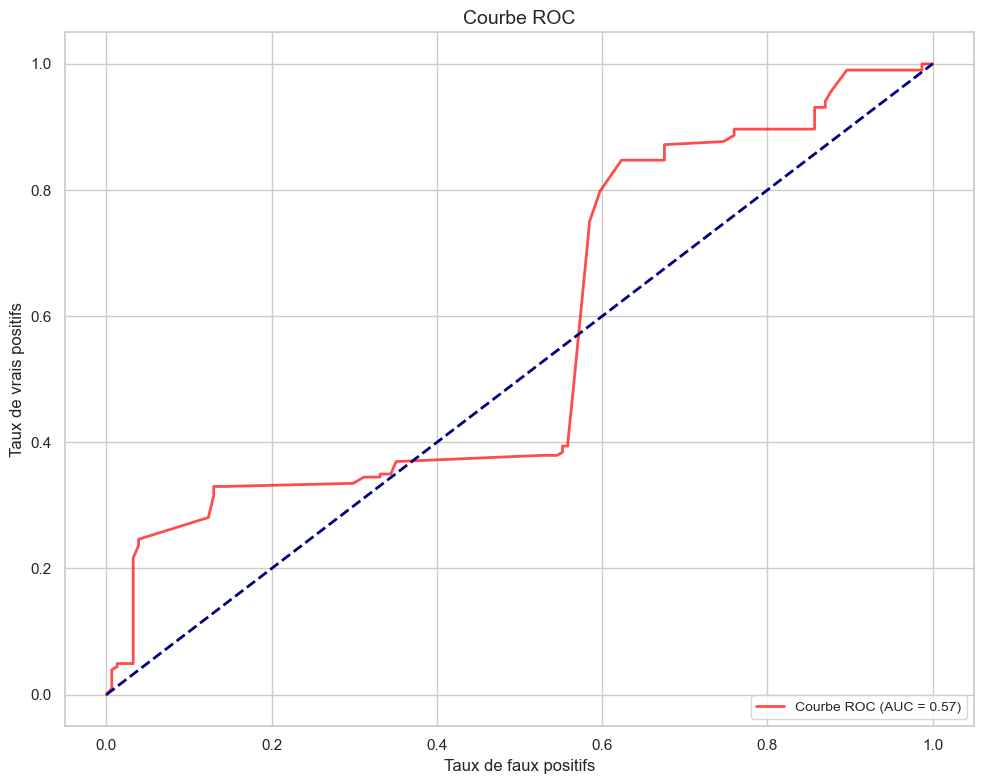

In [166]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculer les probabilités des prédictions de classe 1
y_RL_pred_proba = log_reg.predict_proba(X_RL_test)[:, 1]

# Calculer le taux de faux positifs, le taux de vrais positifs et les seuils
fpr, tpr, thresholds = roc_curve(y_RL_test, y_RL_pred_proba)

# Calculer l'aire sous la courbe ROC (AUC)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='red', lw=2, linestyle='-', alpha=0.7, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Taux de faux positifs', fontsize=12)
plt.ylabel('Taux de vrais positifs', fontsize=12)
plt.title('Courbe ROC', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


In [125]:
log_reg(X_RL_train, y_RL_train, X_RL_test, y_RL_test, 'l2', 1.0)


TypeError: 'LogisticRegression' object is not callable

## Le modéle logit

La fonction logit est une fonction mathématique qui est utilisée dans la régression logistique pour modéliser la probabilité de la variable dépendante binaire en fonction des variables indépendantes.
logit(π(x)) = ln((1−π(x)/π(x))
La régression logistique consiste à ajuster les coefficients des variables indépendantes de telle sorte que la somme pondérée des variables plus un terme constant (appelé "biais" ou "intercept") soit égale au logit de la probabilité de succès. En d'autres termes, on cherche à trouver les coefficients qui maximisent la probabilité observée des données dans l'espace logarithmique. Une fois que le modèle est ajusté, il peut être utilisé pour prédire la probabilité de succès pour de nouvelles observations.

In [90]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Sélectionner les variables explicatives et la variable cible
X_RL = data[['sex', 'chest pain type', 'fasting blood sugar', 'exercise angina', 'ST slope']]
y = data['target']

# Diviser les données en ensembles d'entraînement et de test
X_RL_train2, X_RL_test2, y_RL_train2, y_RL_test2 = train_test_split(X_RL, y, test_size=0.3, random_state=42)

# Ajouter une colonne de constante pour le terme d'interception
X_RL_train2 = sm.add_constant(X_RL_train2)

# Créer un modèle de régression logistique avec les meilleurs paramètres
model = sm.Logit(y_RL_train2, X_RL_train2)

# Entraîner le modèle sur les données d'entraînement
result = model.fit()

# Afficher un résumé des résultats
print(result.summary())

# Faire des prédictions sur les données de test
X_RL_test2 = sm.add_constant(X_RL_test2)
y_RL_pred2 = result.predict(X_RL_test2)

# Convertir les probabilités prédites en classes
y_RL_pred2_class = (y_RL_pred2 > 0.5).astype(int)

# Évaluer les performances du modèle
accuracy_RL2 = accuracy_score(y_RL_test2, y_RL_pred2_class)
print("Accuracy:", accuracy_RL2)


Optimization terminated successfully.
         Current function value: 0.417630
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  833
Model:                          Logit   Df Residuals:                      827
Method:                           MLE   Df Model:                            5
Date:                Sun, 05 May 2024   Pseudo R-squ.:                  0.3973
Time:                        17:15:54   Log-Likelihood:                -347.89
converged:                       True   LL-Null:                       -577.17
Covariance Type:            nonrobust   LLR p-value:                 6.934e-97
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -6.9257      0.530    -13.060      0.000      -7.965      -5.886
se

L'interprétation des résultats de la régression logistique est la suivante :

Optimization terminated successfully : Cela signifie que l'optimisation du modèle a réussi.
Current function value: 0.417630 : La valeur de la fonction actuelle (log-vraisemblance) est de 0.417630.
Iterations 7 : Le modèle a convergé après 7 itérations.
Dep. Variable: target : La variable dépendante du modèle est "target".
No. Observations: 833 : Il y a 833 observations dans l'ensemble de données.
Df Residuals: 827 : Degré de liberté des résidus est de 827.
Method: MLE : La méthode d'estimation utilisée est la méthode du maximum de vraisemblance.
converged: True : Le modèle a convergé avec succès.
Pseudo R-squ.: 0.3973 : Le pseudo R-carré du modèle est de 0.3973, ce qui indique un bon ajustement du modèle aux données.
Log-Likelihood: -347.89 : La log-vraisemblance du modèle est de -347.89.
LL-Null: -577.17 : La log-vraisemblance du modèle nul est de -577.17.
LLR p-value: 6.934e-97 : La p-valeur du test du rapport de vraisemblance est très faible, ce qui suggère que le modèle est significativement meilleur que le modèle nul.
coef : Il s'agit des coefficients estimés pour chaque variable explicative dans le modèle de régression logistique.
std err : C'est l'écart-type de l'estimateur du coefficient.
z : C'est la statistique z, qui mesure la déviation de chaque coefficient par rapport à zéro, en tenant compte de l'erreur standard.
P>|z| : C'est la p-valeur associée à la statistique z. Elle indique la probabilité d'observer une statistique z aussi extrême que celle observée si l'hypothèse nulle (le coefficient est nul) est vraie.
[0.025 0.975] : Ce sont les bornes de l'intervalle de confiance à 95% pour chaque coefficient. Elles indiquent la plage de valeurs dans laquelle le coefficient réel a 95% de chances de se situer.
const : Le coefficient constant est -6.9257.
sex, chest pain type, fasting blood sugar, exercise angina, ST slope : Ce sont les coefficients des variables explicatives. Chaque coefficient représente la contribution de la variable correspondante à l'augmentation des chances de la variable cible.
Accuracy: 0.8599439775910365 : L'exactitude du modèle sur les données de test est de 85.99%. Cela signifie que le modèle prédit correctement la classe de la variable cible pour environ 86% des observations.

const : L'intercept, également appelé constante, est estimé à -6.9257. Cela signifie que lorsque toutes les autres variables explicatives sont nulles, le logarithme des cotes de la variable cible est estimé à -6.9257.
sex : Le coefficient associé à la variable 'sex' est de 1.4039. Cela suggère que pour chaque unité d'augmentation dans la variable 'sex' (par exemple, de 0 à 1, représentant généralement les catégories binaire), le logarithme des cotes de la variable cible augmente d'environ 1.4039, toutes choses étant égales par ailleurs. La valeur p très faible (0.000) indique que ce coefficient est statistiquement significatif.
chest pain type : Le coefficient pour la variable 'chest pain type' est de 0.8047. Cela suggère qu'une augmentation d'une unité dans 'chest pain type' est associée à une augmentation d'environ 0.8047 dans le logarithme des cotes de la variable cible, toutes choses étant égales par ailleurs. La valeur p très faible (0.000) indique que ce coefficient est statistiquement significatif.
fasting blood sugar : Le coefficient associé à la variable 'fasting blood sugar' est de 0.9619. Cela suggère qu'une augmentation d'une unité dans 'fasting blood sugar' est associée à une augmentation d'environ 0.9619 dans le logarithme des cotes de la variable cible, toutes choses étant égales par ailleurs. La valeur p très faible (0.000) indique que ce coefficient est statistiquement significatif.
exercise angina : Le coefficient pour la variable 'exercise angina' est de 1.2847. Cela suggère qu'une augmentation d'une unité dans 'exercise angina' est associée à une augmentation d'environ 1.2847 dans le logarithme des cotes de la variable cible, toutes choses étant égales par ailleurs. La valeur p très faible (0.000) indique que ce coefficient est statistiquement significatif.
ST slope : Le coefficient associé à la variable 'ST slope' est de 1.6709. Cela suggère qu'une augmentation d'une unité dans 'ST slope' est associée à une augmentation d'environ 1.6709 dans le logarithme des cotes de la variable cible, toutes choses étant égales par ailleurs. La valeur p très faible (0.000) indique que ce coefficient est statistiquement significatif.
En résumé, tous les coefficients sont significativement différents de zéro avec des valeurs p très faibles, ce qui suggère que toutes les variables explicatives ont un effet significatif sur la prédiction de la variable cible dans le modèle de régression logistique.

## Rapport de vraisemblance

Le rapport de vraisemblance est une mesure de la force des preuves fournies par les données en faveur d'un modèle statistique par rapport à un autre. En régression logistique, le rapport de vraisemblance est souvent utilisé pour comparer deux modèles, l'un comprenant toutes les variables explicatives et l'autre excluant une ou plusieurs de ces variables.

In [87]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import chi2

# Définition du modèle complet avec toutes les variables explicatives
model_full = sm.Logit(y, x)
result_full = model_full.fit()

# Définition du modèle restreint en excluant une ou plusieurs variables explicatives
# Par exemple, exclure la variable 'fasting blood sugar'
X_restricted = X_RL
model_restricted = sm.Logit(y, X_restricted)
result_restricted = model_restricted.fit()

# Calcul du rapport de vraisemblance
LR_statistic = 2 * (result_full.llf - result_restricted.llf)
p_value = chi2.sf(LR_statistic, df=result_full.df_model - result_restricted.df_model)

# Affichage du résultat
print("Rapport de vraisemblance :", LR_statistic)
print("p-value :", p_value)


Optimization terminated successfully.
         Current function value: 0.398808
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.574237
         Iterations 6
Rapport de vraisemblance : 417.5203818212608
p-value : 4.7755902886641445e-87


Le rapport de vraisemblance de 417.52 indique que le modèle complet (avec toutes les variables explicatives) est significativement meilleur que le modèle restreint (sans certaines variables). La p-valeur très faible (4.7755902886641445e-87) indique une forte évidence contre l'hypothèse nulle selon laquelle le modèle restreint est meilleur que le modèle complet.

En conclusion, ces résultats suggèrent que le modèle complet est statistiquement préférable au modèle restreint, ce qui signifie que les variables explicatives incluses dans le modèle complet contribuent de manière significative à l'explication de la variable cible.

In [89]:
import numpy as np
import statsmodels.api as sm

# Définition du modèle complet avec toutes les variables explicatives
model_full = sm.Logit(y, x)
result_full = model_full.fit()

# Calcul de l'AIC
n_obs = len(y)
AIC = -2 * result_full.llf + 2 * (result_full.df_model + 1)

# Calcul du BIC
BIC = -2 * result_full.llf + (result_full.df_model + 1) * np.log(n_obs)

# Affichage des résultats
print("AIC :", AIC)
print("BIC :", BIC)


Optimization terminated successfully.
         Current function value: 0.398808
         Iterations 7
AIC : 971.1625359644795
BIC : 1027.061330411641


AIC (Critère d'information d'Akaike) : L'AIC mesure la qualité d'un modèle par rapport à un autre modèle. Plus l'AIC est faible, meilleure est la qualité du modèle. Dans votre cas, avec un AIC de 971.16, cela suggère que le modèle est relativement bon en termes d'ajustement aux données.
BIC (Critère d'information bayésien) : Le BIC pénalise les modèles plus complexes davantage que l'AIC. Il favorise donc la simplicité du modèle. Comme pour l'AIC, un BIC plus bas indique un meilleur ajustement du modèle. Avec un BIC de 1027.06, cela suggère également un ajustement raisonnable du modèle, bien que légèrement moins bon que l'AIC.

## Test de Wald

In [94]:
# Faire un test de Wald pour un coefficient spécifique, par exemple le coefficient de la variable 'sex'
wald_test = result.wald_test("sex = 0")

# Afficher les résultats du test
print("Statistic:", wald_test.statistic)
print("P-value:", wald_test.pvalue)
print("Degrees of Freedom:", wald_test.df_denom)

Statistic: [[35.63274284]]
P-value: 2.382491361927258e-09
Degrees of Freedom: 1.0


Statistic: La statistique du test de Wald est de 35.63.
P-value: La p-value associée au test est de 2.38e-09, ce qui est très proche de zéro.
Degrees of Freedom: Le degré de liberté pour le test est de 1.
Ces résultats suggèrent que le coefficient de la variable 'sex' est significativement différent de zéro dans le modèle de régression logistique. La faible p-value indique que nous avons des preuves suffisantes pour rejeter l'hypothèse nulle selon laquelle ce coefficient est nul. En d'autres termes, le sexe semble avoir un effet significatif sur la variable cible dans le modèle.

Optimization terminated successfully.
         Current function value: 0.398808
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.420142
         Iterations 6


AttributeError: 'LogitResults' object has no attribute 'compare_lr_test'

## Prédictions


In [113]:
from sklearn.metrics import accuracy_score

# Ajouter une colonne de constante aux données de test
X_RL_test2 = sm.add_constant(X_RL_test2)

# Faire des prédictions sur les données de test
y_RL_pred2 = result.predict(X_RL_test2)

# Convertir les probabilités prédites en classes
y_RL_pred2_class = (y_RL_pred2 > 0.5).astype(int)
# Évaluer les performances du modèle
accuracy_RL2 = accuracy_score(y_RL_test2, y_RL_pred2_class)
print("Accuracy:", accuracy_RL2)


Accuracy: 0.8599439775910365


In [114]:
y_RL_pred2

390     0.880866
247     0.820345
260     0.025446
155     0.963922
984     0.409717
          ...   
120     0.448212
553     0.820345
1023    0.981913
668     0.217610
72      0.738604
Length: 357, dtype: float64

## courbe de ROC

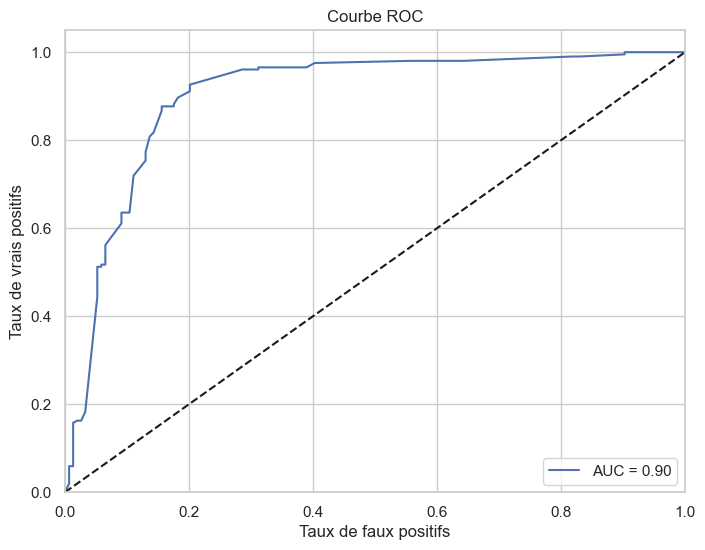

In [115]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculer les scores de probabilité pour les données de test
y_scores = result.predict(X_RL_test2)

# Calculer le taux de faux positifs, le taux de vrais positifs et les seuils à partir des scores de probabilité
fpr, tpr, thresholds = roc_curve(y_RL_test2, y_scores)

# Calculer l'aire sous la courbe ROC (AUC)
auc = roc_auc_score(y_RL_test2, y_scores)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # ligne en pointillés représentant une prédiction aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


In [116]:
# Calcul de True Positives (TP), False Positives (FP), True Negatives (TN), False Negatives (FN)
TP = sum((y_RL_test2 == 1) & (y_RL_pred2_class == 1))
FP = sum((y_RL_test2 == 0) & (y_RL_pred2_class == 1))
TN = sum((y_RL_test2 == 0) & (y_RL_pred2_class == 0))
FN = sum((y_RL_test2 == 1) & (y_RL_pred2_class == 0))

# Calcul de Sensitivity et Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Sensitivity: 0.8719211822660099
Specificity: 0.8441558441558441


La sensibilité (Sensitivity) mesure la capacité du modèle à identifier correctement les cas positifs. Un score de 0.87 signifie que le modèle identifie correctement environ 87 % des cas positifs dans les données de test.
La spécificité (Specificity) quant à elle mesure la capacité du modèle à identifier correctement les cas négatifs. Un score de 0.84 indique que le modèle identifie correctement environ 84 % des cas négatifs dans les données de test.
En résumé, ces résultats montrent que le modèle a une bonne capacité à distinguer à la fois les cas positifs et négatifs, ce qui indique une performance globalement satisfaisante.

# Arbre de décision - Decision Tree

Les arbres de decision sont couramment utilisés pour expliquer et/ou predire les valeurs d’une variable à l’aide de variables explicatives qui peuvent etre quantitatives ou qualitatives. Cette technique est l’une des plus intuitives et des plus
populaires du data mining car elle fournit des regles explicites de classement.

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Sélection des fonctionnalités déjà choisies par grid search
features = ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
            'fasting blood sugar', 'resting ecg', 'max heart rate',
            'exercise angina', 'oldpeak', 'ST slope']

# Sélection des données avec les fonctionnalités choisies
X_dt = data[features]
y = data['target']

# Diviser les données en ensembles d'entraînement et de test
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y, test_size=0.3, random_state=42)

# Créer et entraîner le modèle d'arbre de décision
model = DecisionTreeClassifier(random_state=42)
model.fit(X_dt_train, y_dt_train)

# Faire des prédictions sur les données de test
y_pred_dt = model.predict(X_dt_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_dt_test, y_pred_dt)
print("Accuracy:", accuracy)


Accuracy: 0.8739495798319328


In [127]:
!pip install scikit-learn graphviz






In [129]:
conda install -c anaconda graphviz


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\msi\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.08.22 |       haa95532_0         161 KB  anaconda
    cairo-1.16.0               |       haedb8bc_5         2.2 MB  anaconda
    certifi-2023.11.17         |  py311haa95532_0         161 KB  anaconda
    conda-content-trust-0.2.0  |  py311haa95532_0          79 KB  anaconda
    expat-2.5.0                |       hd77b12b_0         323 KB  anaconda
    font-ttf-dejavu-sans-mono-2.37|       hd3eb1b0_0         387 KB  anaconda
    font-ttf-inconsolata-2.001 |       hcb22688_0          95 KB  anaconda
    font-ttf-source-code-pro-2.030|       hd3eb1b0_0         923 KB  anaconda
    font-ttf-ubuntu-0.83       |       h8b1ccd4_0         1.8 MB  anaconda
    fontconfig-2.14.1   

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/

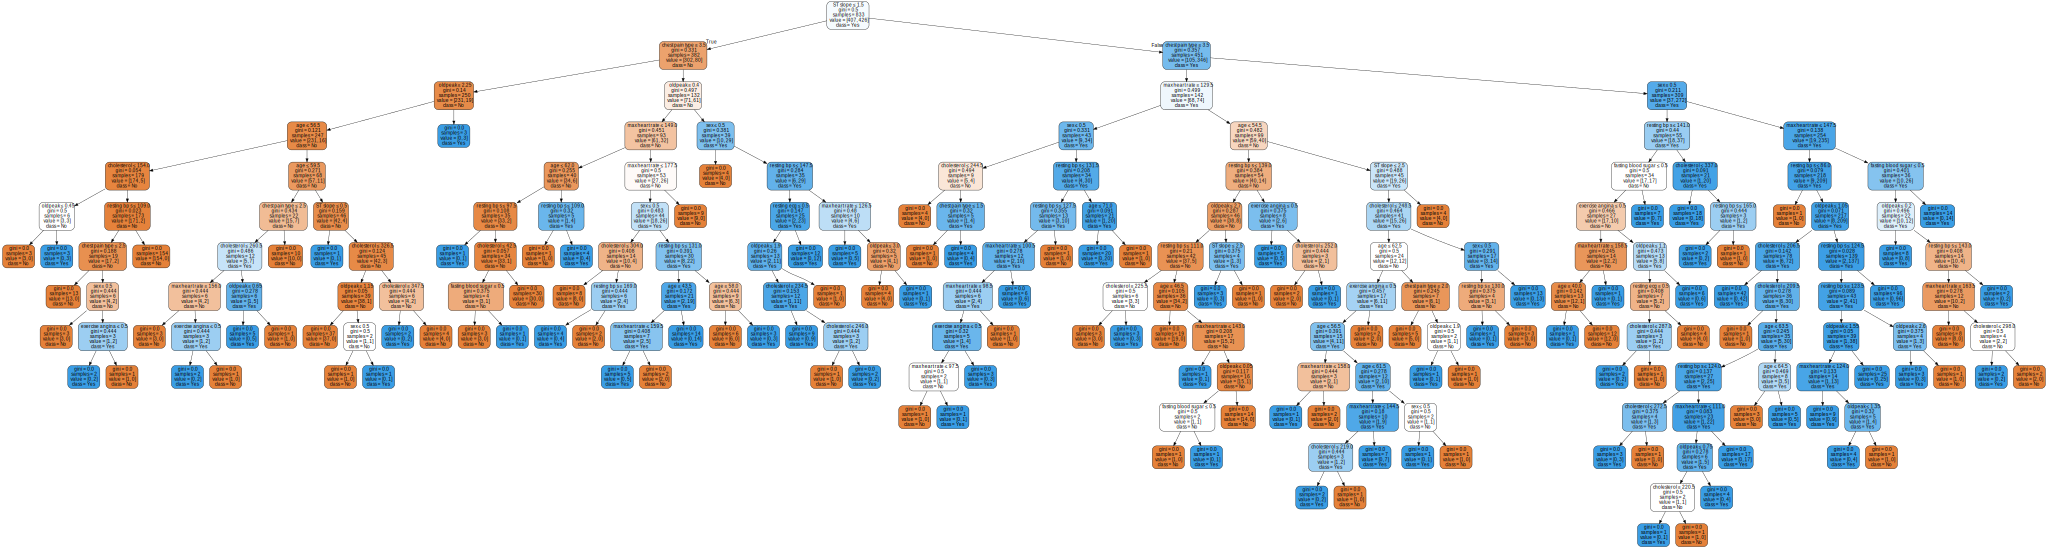

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

# Création du modèle d'arbre de décision
model2 = DecisionTreeClassifier()

# Entraînement du modèle sur les données
model2.fit(X_dt_train, y_dt_train)

# Exporter l'arbre de décision au format DOT avec la taille spécifiée
dot_data = export_graphviz(model2, out_file=None, 
                           feature_names=X_dt.columns,  
                           class_names=['No', 'Yes'],  
                           filled=True, rounded=True,  
                           special_characters=True )  # Limite la profondeur de l'arbre à 3 niveaux

graph = graphviz.Source(dot_data) 

graph 
# Visualisation de l'arbre de décision
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
# Affichage dans le notebook
graph


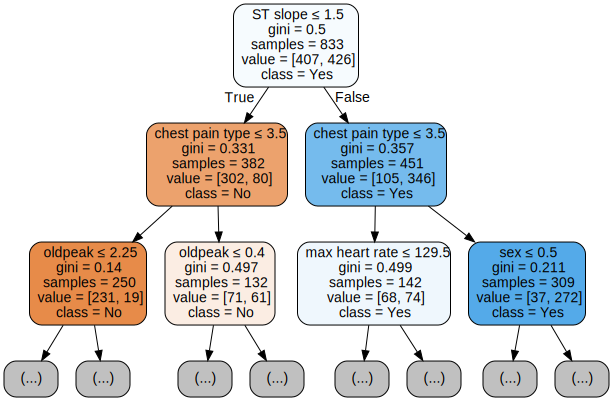

In [185]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

# Création du modèle d'arbre de décision
model2 = DecisionTreeClassifier()

# Entraînement du modèle sur les données
model2.fit(X_dt_train, y_dt_train)

# Exporter l'arbre de décision au format DOT avec la taille spécifiée
dot_data = export_graphviz(model2, out_file=None, 
                           feature_names=X_dt.columns,  
                           class_names=['No', 'Yes'],  
                           filled=True, rounded=True,  
                           special_characters=True,
                           max_depth=2)  # Limite la profondeur de l'arbre à 3 niveaux

graph = graphviz.Source(dot_data) 

graph 
# Visualisation de l'arbre de décision
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
# Affichage dans le notebook
graph


ST slope ≤ 1.5: Si le ST slope est inférieur ou égal à 1.5, la classe prédite est "Yes" (maladie cardiaque) avec un coefficient de Gini de 0.5. Il y a 833 échantillons dans cet ensemble, avec 407 dans la classe "No" et 426 dans la classe "Yes".
Chest pain type ≤ 3.5: Si le type de douleur thoracique est inférieur ou égal à 3.5, la classe prédite est "No" (pas de maladie cardiaque) avec un coefficient de Gini de 0.331. Il y a 382 échantillons dans cet ensemble, avec 302 dans la classe "No" et 80 dans la classe "Yes".
Oldpeak ≤ 2.25: Si l'ancien pic est inférieur ou égal à 2.25, la classe prédite est "No" avec un coefficient de Gini de 0.14. Il y a 250 échantillons dans cet ensemble, avec 231 dans la classe "No" et 19 dans la classe "Yes".
Max heart rate ≤ 129.5: Si la fréquence cardiaque maximale est inférieure ou égale à 129.5, la classe prédite est "Yes" avec un coefficient de Gini de 0.499. Il y a 142 échantillons dans cet ensemble, avec 68 dans la classe "No" et 74 dans la classe "Yes".

C:\Program Files\KMSpico\temp\ipykernel_13192\810992796.py:6: RuntimeWarning: divide by zero encountered in log2
  return -p * np.log2(p) - (1 - p) * np.log2(1 - p)
C:\Program Files\KMSpico\temp\ipykernel_13192\810992796.py:6: RuntimeWarning: invalid value encountered in scalar multiply
  return -p * np.log2(p) - (1 - p) * np.log2(1 - p)


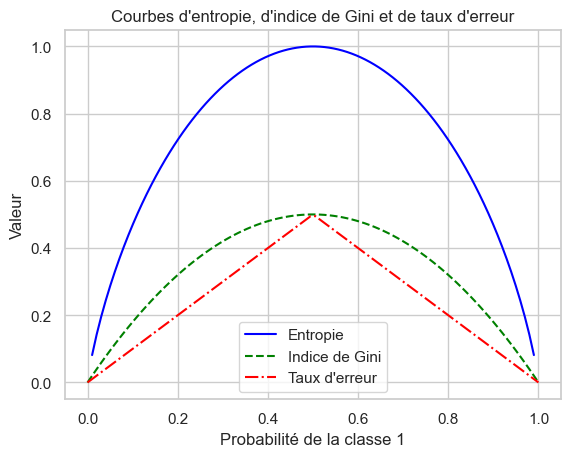

In [158]:
import numpy as np
import matplotlib.pyplot as plt

# Définition de la fonction d'entropie
def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Définition de la fonction de l'indice de Gini
def gini(p):
    return 2 * p * (1 - p)

# Définition de la fonction de l'indice du taux d'erreur
def error_rate(p):
    return 1 - np.max([p, 1 - p])

# Générer des valeurs de probabilité de classe de 0 à 1
probabilities = np.linspace(0, 1, 100)

# Calcul des valeurs d'entropie, de Gini et de taux d'erreur
ent_values = [entropy(p) if p != 0 else None for p in probabilities]
gini_values = [gini(p) for p in probabilities]
error_values = [error_rate(p) for p in probabilities]

# Tracer les courbes
plt.plot(probabilities, ent_values, label='Entropie', linestyle='-', color='blue')
plt.plot(probabilities, gini_values, label='Indice de Gini', linestyle='--', color='green')
plt.plot(probabilities, error_values, label='Taux d\'erreur', linestyle='-.', color='red')

# Ajouter des légendes, un titre et des étiquettes d'axe
plt.xlabel('Probabilité de la classe 1')
plt.ylabel('Valeur')
plt.title('Courbes d\'entropie, d\'indice de Gini et de taux d\'erreur')
plt.legend()

# Afficher le graphe
plt.grid(True)
plt.show()


L'output montre trois courbes : l'entropie, l'indice de Gini et le taux d'erreur. Ces courbes sont représentées en fonction de la probabilité de la classe 1, qui varie de 0,0 à 1,0.

Entropie
L'entropie est une mesure de l'incertitude ou du désordre dans un système. Dans ce contexte, l'entropie est utilisée pour mesurer la pureté d'un ensemble d'instances. Un ensemble d'instances pures est un ensemble dans lequel toutes les instances appartiennent à la même classe. Un ensemble d'instances impures est un ensemble dans lequel les instances appartiennent à différentes classes.
Dans ce graphe, l'entropie est la plus élevée lorsque la probabilité de la classe 1 est de 0,5. Cela signifie que l'ensemble d'instances est impur et que les instances sont réparties uniformément entre les deux classes. L'entropie diminue à mesure que la probabilité de la classe 1 se rapproche de 0,0 ou de 1,0. Cela signifie que l'ensemble d'instances devient de plus en plus pur et que les instances appartiennent de plus en plus à la même classe.

Indice de Gini
L'indice de Gini est une autre mesure de l'impureté d'un ensemble d'instances. Il est similaire à l'entropie, mais il est plus sensible aux différences de probabilité de classe. L'indice de Gini est de 0 pour un ensemble d'instances pures et de 1 pour un ensemble d'instances impures.
Dans ce graphe, l'indice de Gini est le plus élevé lorsque la probabilité de la classe 1 est de 0,5. Cela signifie que l'ensemble d'instances est impur et que les instances sont réparties uniformément entre les deux classes. L'indice de Gini diminue à mesure que la probabilité de la classe 1 se rapproche de 0,0 ou de 1,0. Cela signifie que l'ensemble d'instances devient de plus en plus pur et que les instances appartiennent de plus en plus à la même classe.

Taux d'erreur
Le taux d'erreur est la proportion d'instances mal classées par un modèle d'apprentissage automatique. Le taux d'erreur est de 0 pour un modèle parfait et de 1 pour un modèle qui ne parvient pas à classer correctement aucune instance.
Dans ce graphe, le taux d'erreur est le plus élevé lorsque la probabilité de la classe 1 est de 0,5. Cela signifie que le modèle d'apprentissage automatique est le plus susceptible de mal classer les instances lorsque la probabilité de la classe 1 est de 0,5. Le taux d'erreur diminue à mesure que la probabilité de la classe 1 se rapproche de 0,0 ou de 1,0. Cela signifie que le modèle d'apprentissage automatique est de plus en plus susceptible de classer correctement les instances lorsque la probabilité de la classe 1 est de 0,0 ou de 1,0.

Conclusion:Les courbes d'entropie, d'indice de Gini et de taux d'erreur permettent de visualiser la performance d'un modèle d'apprentissage automatique en fonction de la distribution des instances dans les classes. Ces courbes peuvent être utiles pour choisir le modèle d'apprentissage automatique le plus performant pour une tâche donnée.

## Prédictions

In [159]:
# Prédiction sur les données de test
y_dt_pred = model.predict(X_dt_test)

# Comparaison des prédictions avec les vraies étiquettes
predictions_dt = np.column_stack((y_dt_pred, y_dt_test))
print("Prédictions vs Vraies étiquettes :")
print(predictions_dt)

Prédictions vs Vraies étiquettes :
[[1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]

## courbe de ROC

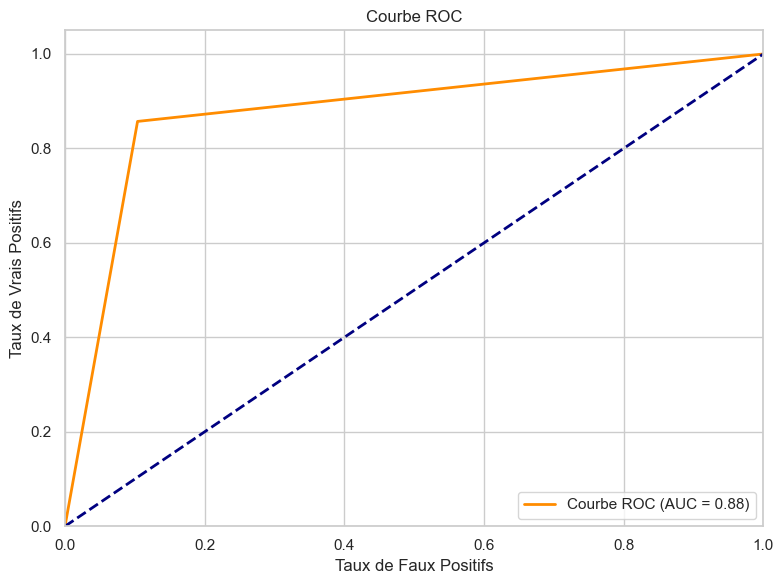

In [164]:
# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_dt_test, y_dt_pred)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC avec des ajustements
plt.figure(figsize=(8, 6))  # Ajuster la taille de la figure
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.grid(True)  # Ajouter une grille pour une meilleure lisibilité
plt.tight_layout()  # Ajuster automatiquement les sous-graphiques pour éviter le chevauchement
plt.show()


In [167]:
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_dt_test, y_dt_pred)

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(conf_matrix)


Matrice de confusion :
[[138  16]
 [ 29 174]]


En utilisant les valeurs de la matrice de confusion :

Vrais négatifs (VN) : 138
Faux positifs (FP) : 16
Faux négatifs (FN) : 29
Vrais positifs (VP) : 174

Interprétation :
138 vrais négatifs, ce sont les cas où le modèle a correctement prédit les échantillons négatifs.
16 faux positifs, ce sont les cas où le modèle a prédit à tort des échantillons négatifs comme positifs.
29 faux négatifs, ce sont les cas où le modèle a prédit à tort des échantillons positifs comme négatifs.
174 vrais positifs, ce sont les cas où le modèle a correctement prédit les échantillons positifs.
En résumé, ce modèle semble performant, car il a un nombre élevé de vrais positifs et vrais négatifs par rapport aux faux positifs et faux négatifs.

In [170]:
# Afficher le rapport de classification
print("Classification Report:")
print(classification_report(y_dt_test, y_dt_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       154
           1       0.92      0.86      0.89       203

    accuracy                           0.87       357
   macro avg       0.87      0.88      0.87       357
weighted avg       0.88      0.87      0.87       357



Ce rapport de classification fournit des informations détaillées sur les performances du modèle de classification.
Précision (precision) : C'est la proportion d'observations positives prédites correctement parmi toutes les observations positives prédites par le modèle. Pour la classe 0, la précision est de 83%, ce qui signifie que sur toutes les prédictions de la classe 0 faites par le modèle, 83% sont réellement de la classe 0. Pour la classe 1, la précision est de 92%, ce qui signifie que sur toutes les prédictions de la classe 1 faites par le modèle, 92% sont réellement de la classe 1.
Rappel (recall) : C'est la proportion d'observations positives réellement observées et prédites correctement parmi toutes les observations positives réelles. Pour la classe 0, le rappel est de 90%, ce qui signifie que le modèle a correctement identifié 90% de toutes les observations réelles de la classe 0. Pour la classe 1, le rappel est de 86%, ce qui signifie que le modèle a correctement identifié 86% de toutes les observations réelles de la classe 1.
F1-score : C'est une mesure qui combine à la fois la précision et le rappel en une seule valeur. Il est calculé comme la moyenne harmonique de la précision et du rappel. Un F1-score élevé indique à la fois une précision et un rappel élevés. Pour la classe 0, le F1-score est de 0,86, et pour la classe 1, il est de 0,89.
Support : C'est le nombre d'occurrences réelles de chaque classe dans l'ensemble de données de test.
Accuracy (exactitude) : C'est la proportion totale d'observations correctement classées parmi toutes les observations de l'ensemble de données de test. Dans ce cas, l'exactitude est de 87%, ce qui signifie que le modèle a correctement classé 87% de toutes les observations de l'ensemble de test.
Macro avg : C'est la moyenne non pondérée des métriques pour chaque classe. Dans ce cas, il s'agit de la moyenne des précisions, rappels et F1-scores.
Weighted avg : C'est la moyenne pondérée des métriques pour chaque classe, pondérée par le nombre d'occurrences de chaque classe. Cela donne une meilleure idée de la performance globale du modèle sur toutes les classes.

# Forets aléatoires - Randem Forest

In [192]:
selected_features_rf = ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope']

# Séparer les données en ensembles d'entraînement et de test
x_rf = data[selected_features_rf]
y = data['target']
x_rf_train, x_rf_test, y_rf_train, y_rf_test = train_test_split(x_rf, y, test_size=0.3, random_state=42)

# Initialiser et entraîner le modèle de forêt aléatoire
model3 = RandomForestClassifier(n_estimators=50)
model3.fit(x_rf_train, y_rf_train)



RandomForestClassifier(n_estimators=50)

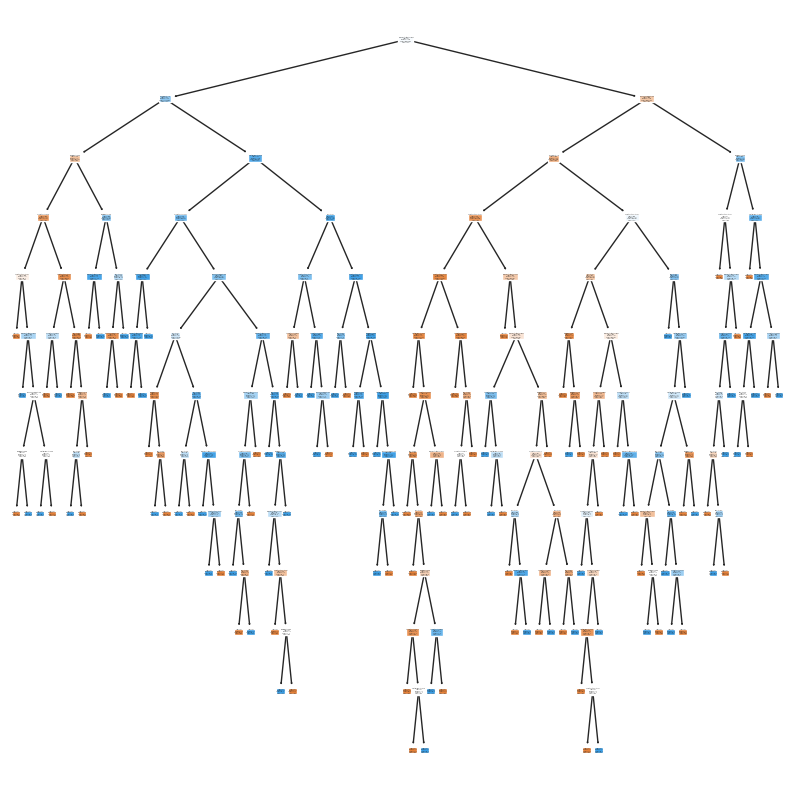

In [193]:
# Visualiser un arbre individuel (par exemple le premier arbre)
plt.figure(figsize=(10, 10))  # Ajuster la taille de la figure
plot_tree(model3.estimators_[0], feature_names=selected_features_rf, class_names=['No', 'Yes'], filled=True)
plt.savefig('random_forest_tree.png', bbox_inches='tight')  # Enregistrer l'image
plt.show()

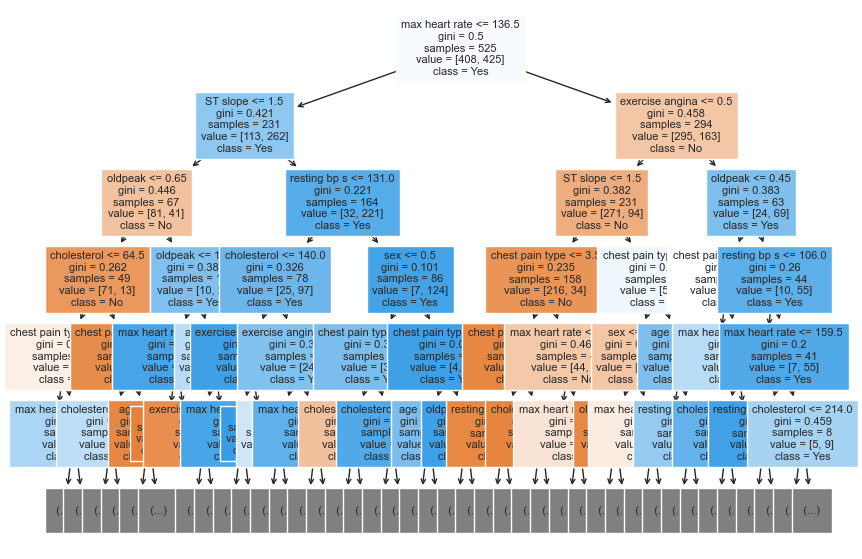

In [196]:
# Visualiser un arbre individuel avec une taille de figure et de police plus petites et une profondeur maximale de l'arbre
plt.figure(figsize=(10, 7))  # Ajuster la taille de la figure
plot_tree(model3.estimators_[0], feature_names=selected_features_rf, class_names=['No', 'Yes'], filled=True, fontsize=8, max_depth=5)
plt.savefig('random_forest_tree.png', bbox_inches='tight')  # Enregistrer l'image
plt.show()

In [197]:
# Faire des prédictions sur l'ensemble de test
y_rf_pred = model3.predict(x_rf_test)

y_rf_pred



array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,

In [198]:
# Afficher le rapport de classification
print("Classification Report:")
print(classification_report(y_rf_test, y_rf_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       154
           1       0.93      0.93      0.93       203

    accuracy                           0.92       357
   macro avg       0.91      0.91      0.91       357
weighted avg       0.92      0.92      0.92       357



Ce rapport de classification fournit des informations détaillées sur les performances du modèle.

Précision (precision) : C'est la capacité du modèle à prédire correctement les exemples positifs. Pour la classe 0, la précision est de 0.90, ce qui signifie que 90% des exemples prédits comme appartenant à la classe 0 sont réellement de la classe 0. Pour la classe 1, la précision est de 0.93, ce qui signifie que 93% des exemples prédits comme appartenant à la classe 1 sont réellement de la classe 1.
Rappel (recall) : C'est la capacité du modèle à identifier correctement les exemples positifs. Pour la classe 0, le rappel est de 0.90, ce qui signifie que le modèle a correctement identifié 90% de tous les exemples de la classe 0. Pour la classe 1, le rappel est de 0.93, ce qui signifie que le modèle a correctement identifié 93% de tous les exemples de la classe 1.
F1-score : C'est une mesure combinée de précision et de rappel, calculée comme la moyenne harmonique des deux. Il est utile lorsque les classes sont déséquilibrées. Pour la classe 0, le F1-score est de 0.90 et pour la classe 1, le F1-score est de 0.93.
Accuracy (précision globale) : C'est la proportion d'exemples correctement classés parmi tous les exemples. Dans ce cas, l'accuracy est de 0.92, ce qui signifie que le modèle a correctement classé 92% de tous les exemples.
En résumé, le modèle semble avoir de très bonnes performances avec des scores élevés de précision, de rappel et de F1-score pour les deux classes, ainsi qu'une accuracy globale élevée de 92%.

## courbe de ROC

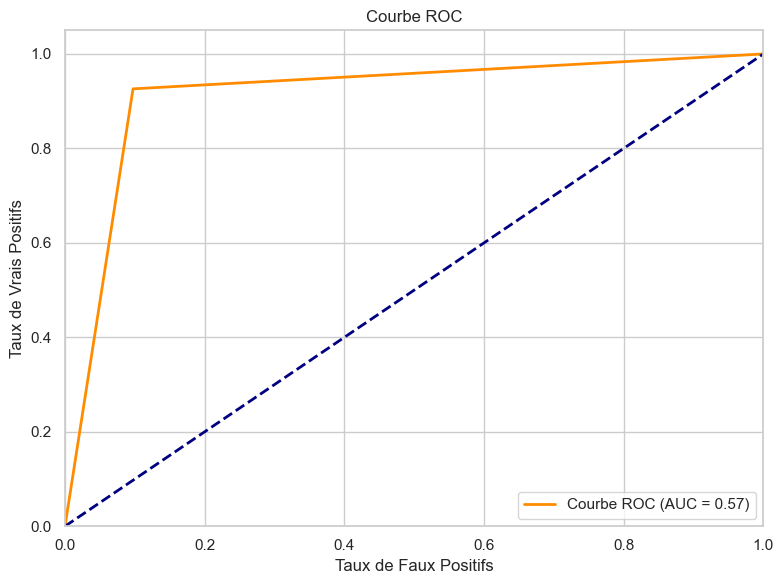

In [199]:
# Calcul de la courbe ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_rf_test, y_rf_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Tracer la courbe ROC avec des ajustements
plt.figure(figsize=(8, 6))  # Ajuster la taille de la figure
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.grid(True)  # Ajouter une grille pour une meilleure lisibilité
plt.tight_layout()  # Ajuster automatiquement les sous-graphiques pour éviter le chevauchement
plt.show()
